## -------------- Business objective:-Build a predictive model to determine to Grade of the house --------------

## Importing Libraries....

In [14]:
import pandas as pd
from tabulate import tabulate
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
sb.set_theme(style="darkgrid")
sb.set(rc={'figure.facecolor':'skyblue'})

## Loading the dataset

In [4]:
data1=pd.read_csv("DS3_C6_S2_Classification_HouseGrade_Data_Project.csv")
data1.head()
data1.sample(5)

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
2138,2139,291,6,5,4,5,YES,70,114,2,97,5,3100,D
254,255,313,5,4,3,4,YES,120,75,3,87,2,3179,D
724,725,300,6,4,3,4,NO,0,116,2,75,5,3212,D
869,870,349,5,2,1,2,YES,85,108,1,51,4,3211,D
1530,1531,310,5,2,1,2,YES,120,78,3,98,3,3494,D


In [5]:
data=data1.copy()

## Data exploration

In [6]:
data1.duplicated().sum()

0

In [7]:
def data_description(data):
    print("shape of dataset---",data.shape)
    print()
    print("size of dataset----",data.size)
    print()
    print("dimension of dataset-----",data.ndim)
    print()
    print(data.columns)
    print()
    print(data.dtypes)
    

In [8]:
data_description(data)

shape of dataset--- (3000, 14)

size of dataset---- 42000

dimension of dataset----- 2

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object


In [9]:
a=data.select_dtypes(exclude="object")
b=data.select_dtypes(include="object")
a.head(2)
b.head(2)
a_lst=list(a.columns)
b_lst=list(b.columns)

print(tabulate({"categorical":b_lst, "numeric":a_lst},headers=["categorical","continuous"]))

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,1,339,6,5,4,6,0,76,2,79,6,3481
1,2,358,5,4,3,4,71,96,3,72,4,3510


,roof,Grade
0,NO,D
1,YES,D


categorical    continuous
-------------  --------------
roof           Id
Grade          Area(total)
               Trooms
               Nbedrooms
               Nbwashrooms
               Twashrooms
               Roof(Area)
               Lawn(Area)
               Nfloors
               API
               ANB
               Expected price


In [10]:
for i in b_lst:
    g=data[i].value_counts()
    print("-------------------------------------------------",i,"----------------------------------------------")
    print(g)
    print("--------------------------------------------------------------------------------------------------------")

------------------------------------------------- roof ----------------------------------------------
YES    1543
NO     1457
Name: roof, dtype: int64
--------------------------------------------------------------------------------------------------------
------------------------------------------------- Grade ----------------------------------------------
D    1270
C     716
B     539
A     399
E      76
Name: Grade, dtype: int64
--------------------------------------------------------------------------------------------------------


## Checking Misiing value.....

In [11]:
data.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

#### no missing value is present in the dataset

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Area(total),3000.0,325.117000,20.507742,290.0,308.00,325.0,343.00,360.0
Trooms,3000.0,7.021667,1.421221,5.0,6.00,7.0,8.00,9.0
Nbedrooms,3000.0,5.023000,1.634838,2.0,4.00,5.0,6.00,8.0
Nbwashrooms,3000.0,4.513667,1.715263,1.0,3.00,4.0,6.00,8.0
Twashrooms,3000.0,6.010667,1.786136,2.0,5.00,6.0,7.00,10.0
Roof(Area),3000.0,48.980667,48.746641,0.0,0.00,71.0,96.00,120.0
Lawn(Area),3000.0,95.609333,14.837388,70.0,83.00,96.0,109.00,120.0
Nfloors,3000.0,4.013333,1.621532,1.0,3.00,4.0,5.00,7.0
API,3000.0,70.190667,17.563460,40.0,55.00,70.0,85.00,100.0


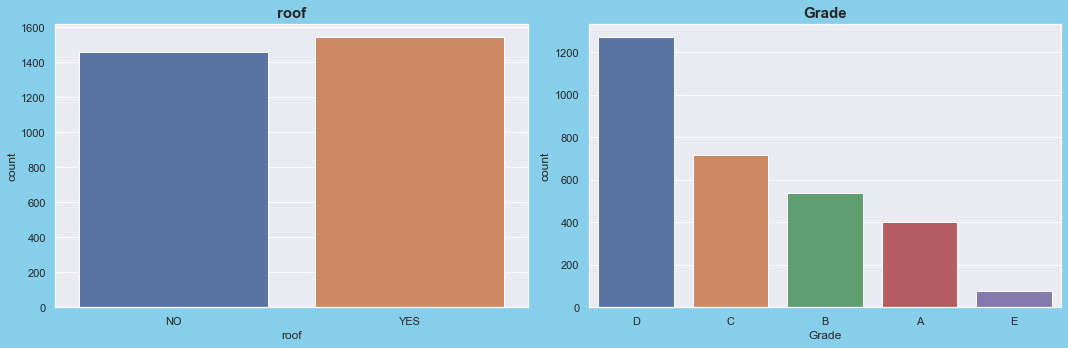

In [15]:
p=1
plt.figure(figsize=(15,5))
for i in b_lst:
    plt.subplot(1,2,p)
    sb.countplot(data[i])
    plt.title(i,fontweight="bold",fontsize=15)
    p=p+1
    plt.tight_layout()
plt.show();

- maximum house has roof
- maximum house is D graded and very few houses is E graded

In [17]:
a_lst1=['Area(total)','Trooms','Nbedrooms','Nbwashrooms','Twashrooms','Roof(Area)','Lawn(Area)','Nfloors','API','ANB','Expected price']

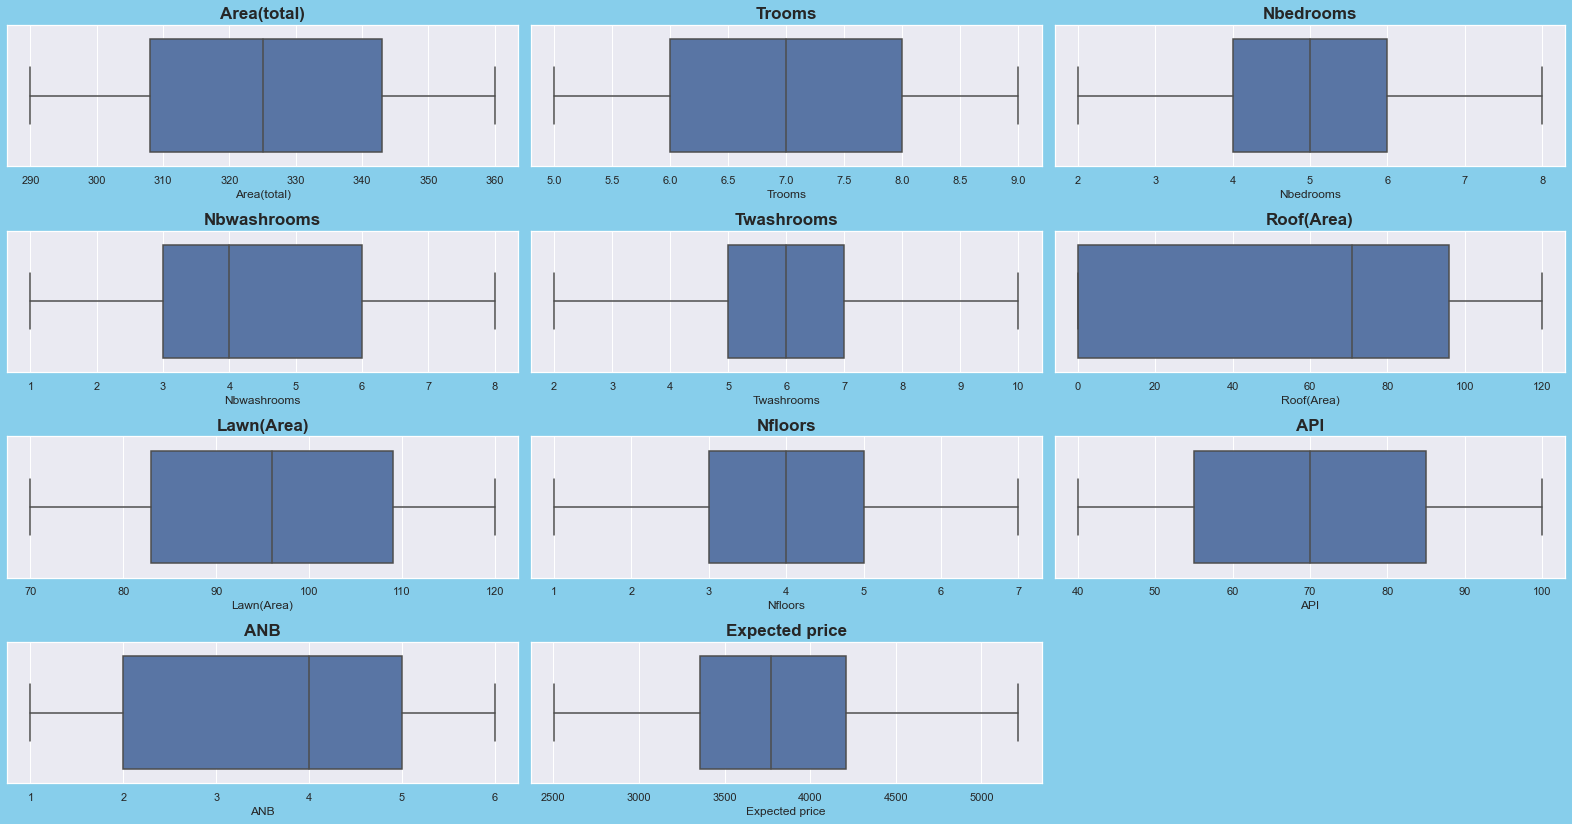

In [19]:
t=1
plt.figure(figsize=(22,14))
for i in a_lst1:
    plt.subplot(5,3,t)
    sb.boxplot(x=data[i])
    plt.title(i,fontweight="bold",fontsize=17)
    t=t+1
    plt.tight_layout()
plt.show() ;

### No numerical features has outlier

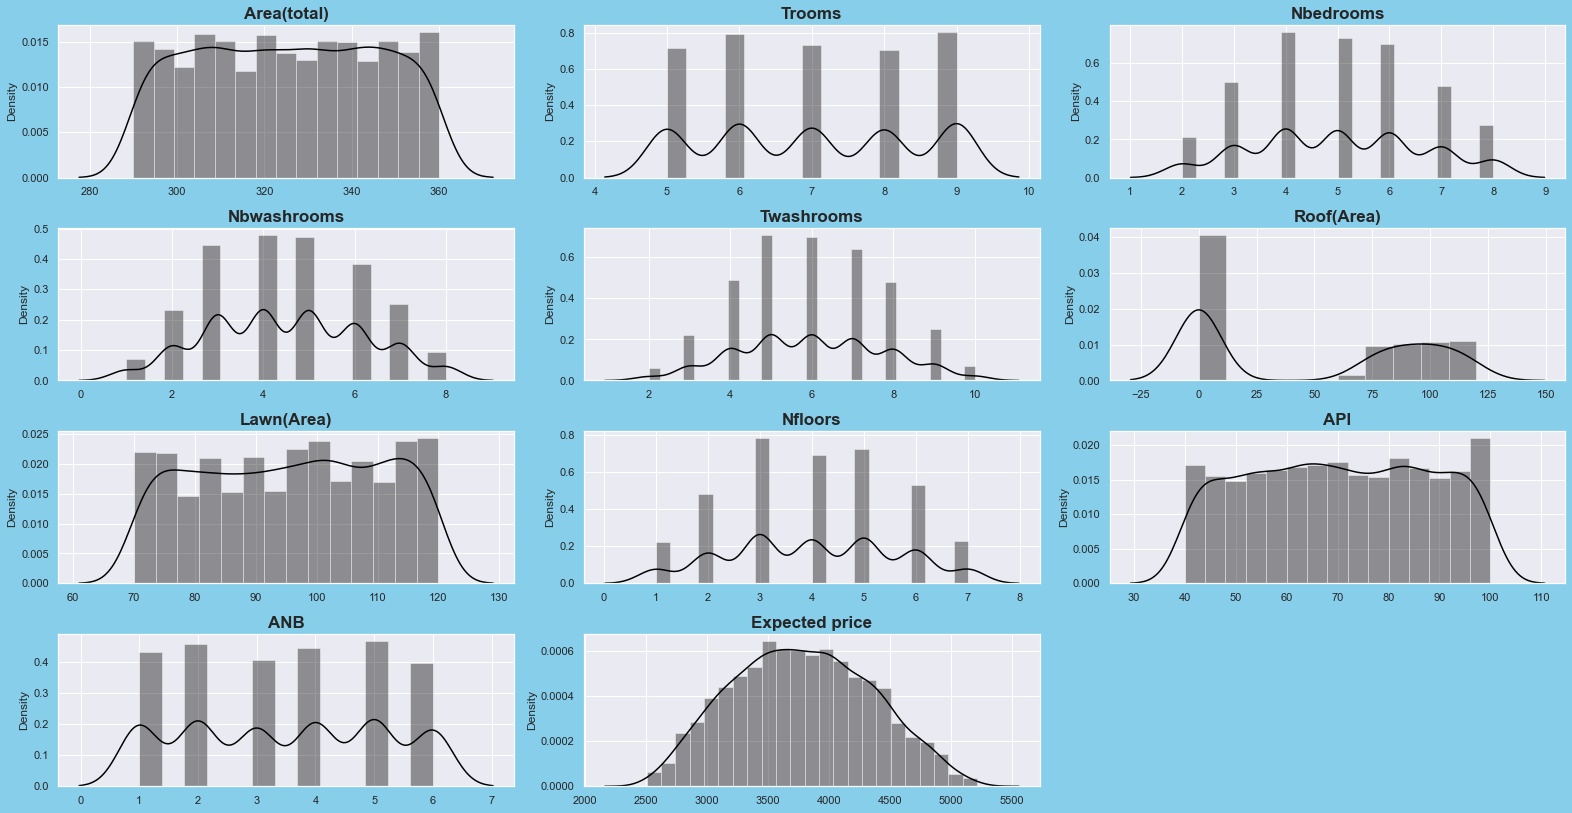

In [20]:
t=1
plt.figure(figsize=(22,14))
for i in a_lst1:
    plt.subplot(5,3,t)
    sb.distplot(x=data[i],color="black")
    plt.title(i,fontweight="bold",fontsize=17)
    t=t+1
    plt.tight_layout()
plt.show()  ;

#### expected price is normally distributed

In [21]:
def boxplot_bi(col1,col2,w=17,l=5):
    plt.figure(figsize=(w,l))
    sb.boxplot(x=data[col1],y=data[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(col1+" VS "+col2,fontsize=15,fontweight="bold")
    plt.show();

### Which graded house are expected to be maximum price and minimum price?

In [22]:
def groupby(colwise,col):
    return(data.groupby(data[colwise]).agg({col:['mean','median','max','min']}))

In [23]:
groupby('Grade','Expected price')

Expected price                    
                mean  median   max   min
Grade                                   
A        4456.583960  4453.0  5216  3700
B        4247.224490  4243.0  5163  3323
C        3887.370112  3903.5  4864  2752
D        3360.353543  3363.0  4435  2528
E        3031.289474  3042.5  3704  2504

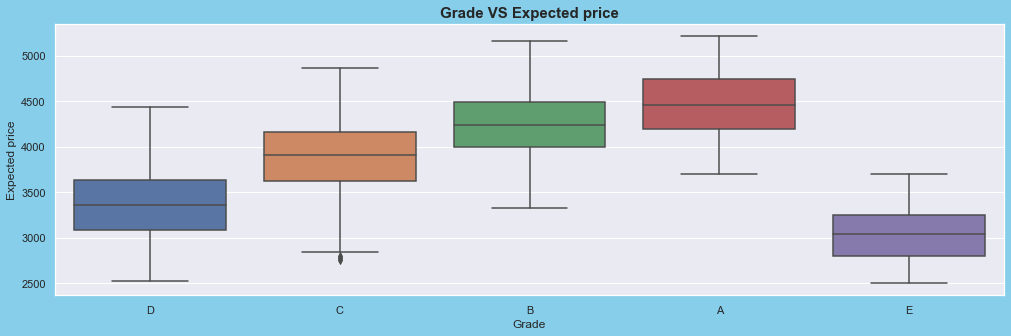

In [24]:
boxplot_bi('Grade','Expected price')

#### price is more for grade A house anas less for grade E houses

### average area in different graded house

In [275]:
groupby('Grade','Area(total)')

Area(total)                 
             mean median  max  min
Grade                             
A      330.343358  332.0  360  290
B      326.866419  328.0  360  290
C      328.505587  330.0  360  290
D      322.048031  321.0  360  290
E      304.631579  301.0  337  290

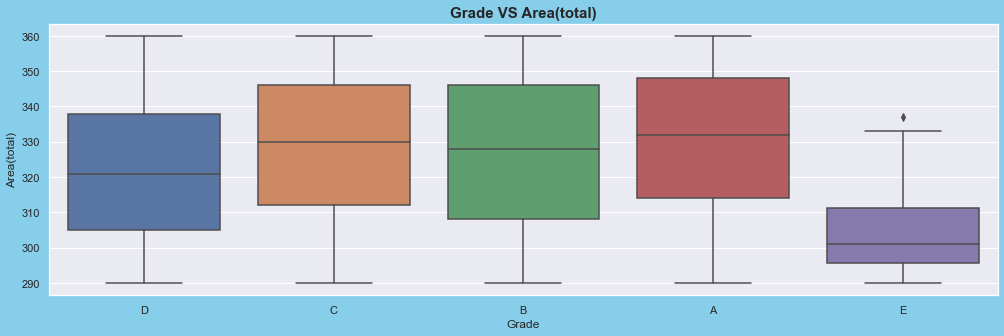

In [276]:
boxplot_bi('Grade','Area(total)')

- total area is more mostly in  GRADE A houses and less in Grade E houses
- total area range of A,B,C,D   are mostly 290-337 

### Average area of lawn grade wise

In [277]:
groupby('Grade','Lawn(Area)')

Lawn(Area)                
            mean median  max min
Grade                           
A      96.578947   97.0  120  70
B      95.649351   97.0  120  70
C      96.611732   98.0  120  70
D      95.203937   95.0  120  70
E      87.565789   83.5  120  70

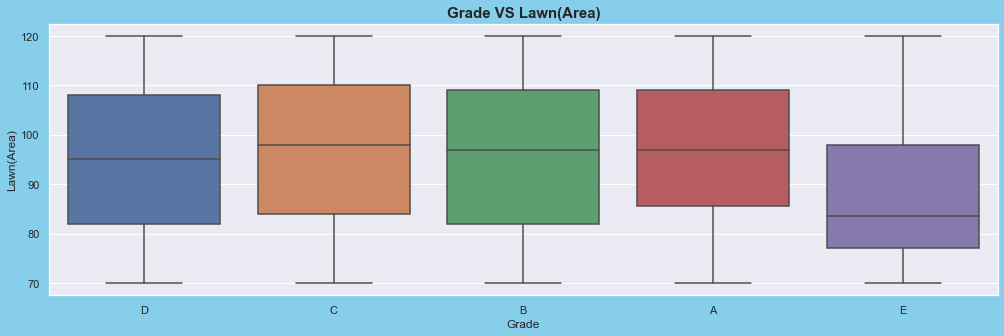

In [278]:
boxplot_bi('Grade','Lawn(Area)')

- Lawn area is queit similar for all graded house except grade E
- for all grade house's lawn area's range is from 70 -120

#### How expected price is effected by the total number of  rooms 

In [279]:
groupby('Trooms','Expected price')

Expected price                    
                 mean  median   max   min
Trooms                                   
5         3123.548780  3108.0  3771  2504
6         3451.812303  3461.5  4153  2787
7         3754.994881  3744.0  4505  3031
8         4125.853097  4125.0  4876  3358
9         4424.204368  4416.0  5216  3700

In [26]:
def scatter_bi(col1,col2):
    plt.figure(figsize=(17,4))
    sb.scatterplot(data[col1],data[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    t=col1+" VS "+col2
    plt.title(t,fontweight="bold",fontsize=15)
    

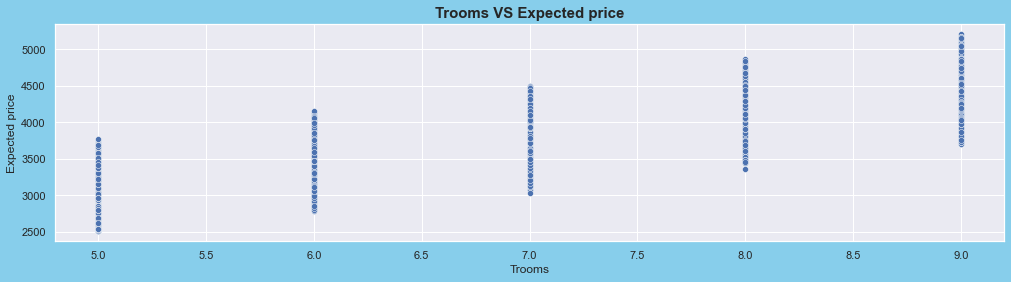

In [27]:
scatter_bi('Trooms','Expected price');

### total rooms and expected price are highly correlated to each other

## Number of rooms in different graded Total rooms

In [28]:
def countplot_bi(col1,col2):
    plt.figure(figsize=(17,4))
    sb.countplot(data[col1],hue=data[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    t=col1+" VS "+col2
    plt.title(t,fontweight="bold",fontsize=15)

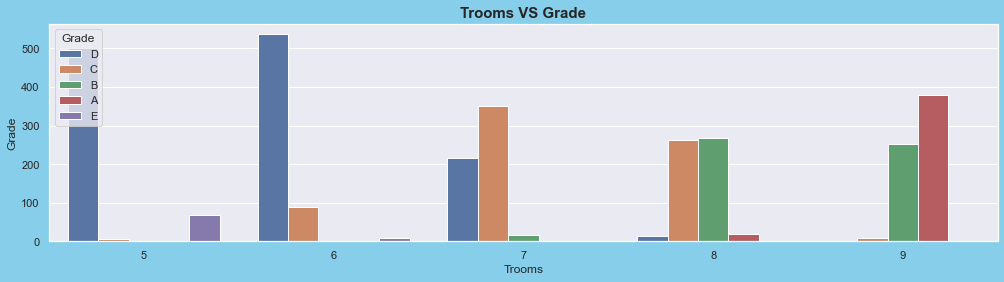

In [29]:
countplot_bi('Trooms','Grade');

- mostly A graded house having 9 rooms
- B graded house have 8 or 9 rooms but having 8 rooms houses are more
- C graded house are mostly 7 rooms
- D graded houses mostly 6 and 7 rooms
- E graded house are very less in number but this type of house have 6 rooms

#### How expected price is effected by the number of floors

In [30]:
groupby('Nfloors','Expected price')

Expected price                    
                  mean  median   max   min
Nfloors                                   
1          3120.206522  3090.5  3744  2528
2          3301.129114  3302.0  4129  2515
3          3437.710938  3436.5  4505  2504
4          3782.029982  3767.0  4811  2797
5          4098.076014  4088.0  5216  3031
6          4297.635321  4286.0  5158  3439
7          4442.876344  4434.0  5166  3700

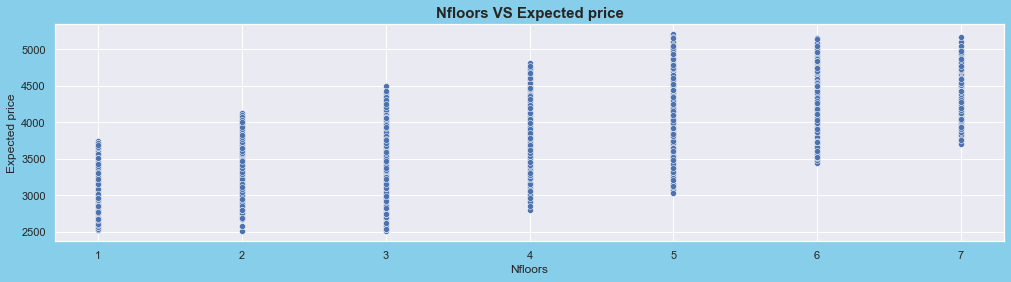

In [31]:
scatter_bi('Nfloors','Expected price');

#### number of floors are highly correlated to each other

### What is the number of room in each graded house?

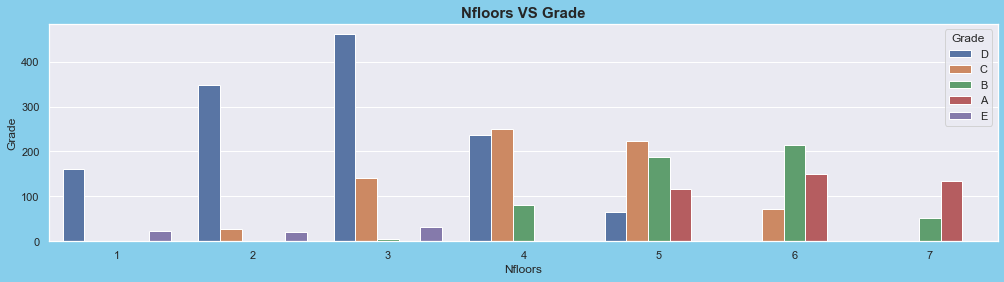

In [32]:
countplot_bi('Nfloors','Grade');

- if a house has 7 and 6  floors that can be Grade A and B house,but for maximum chances of having 7 floors are A graded ,and  maximum chances of having 6 floors are B graded
- if a house has 4 and 5 floors ,amximum chances that should be grade C OR B
- if a house has 1 or 2 or 3 floors,maximum chances that is grade D
- and grade E houses are very less and those houses having  1 , 2 or 3 floors.

In [33]:
def scatter_mul(col1,col2,hue1):
    plt.figure(figsize=(22,4))
    sb.scatterplot(data[col1],data[col2],hue=data[hue1])
    plt.xlabel(col1)
    plt.ylabel(col2)
    t=hue1+" wise "+col1+" VS "+col2
    plt.title(t,fontweight="bold",fontsize=15)

####  Number of floors Vs Expected price Grade wise

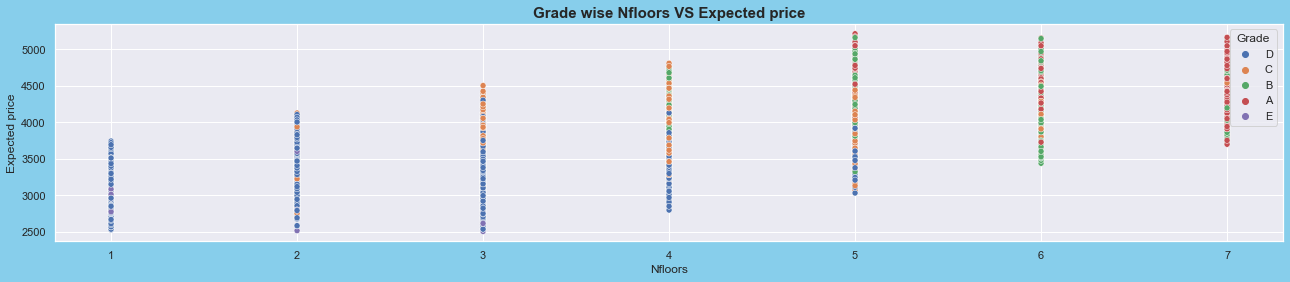

In [34]:
scatter_mul('Nfloors','Expected price','Grade');

In [35]:
def boxplot_mul(col1,col2,hue1):
    plt.figure(figsize=(22,4))
    sb.boxplot(data[col1],data[col2],hue=data[hue1])
    plt.xlabel(col1)
    plt.ylabel(col2)
    t=hue1+" wise "+col1+" VS "+col2
    plt.title(t,fontweight="bold",fontsize=15)

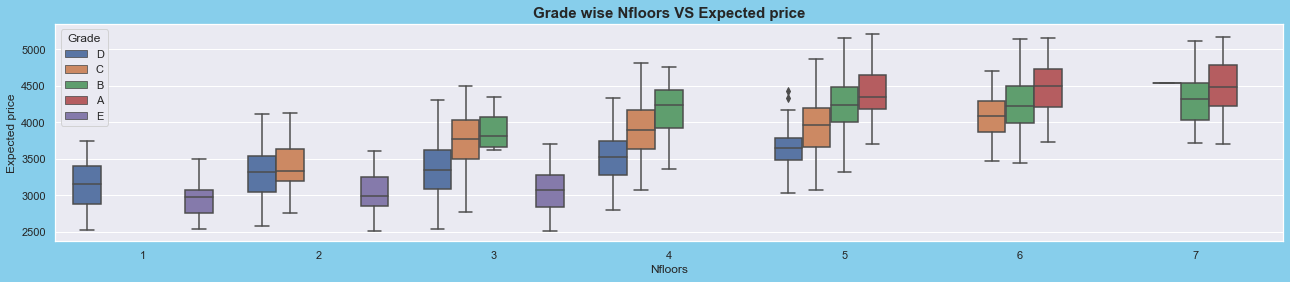

In [36]:
boxplot_mul('Nfloors','Expected price','Grade');

#### having same no of floors, if the grade is more( A>B>C>D>E) the expected price is more

### Relationship between Number of bedrooms and Total rooms

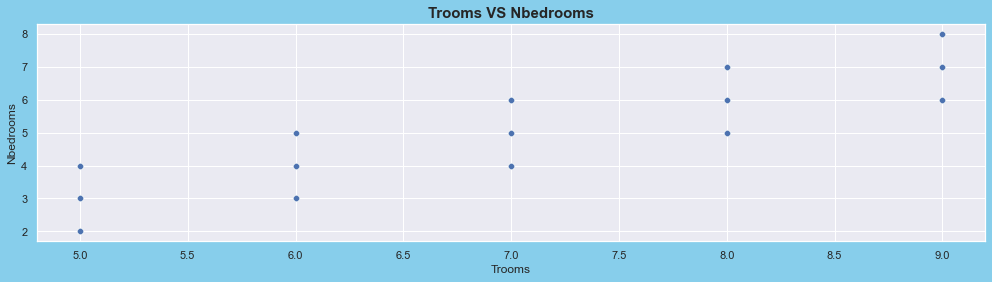

In [37]:
scatter_bi('Trooms','Nbedrooms');

#### total rooms are highly correlated to each others

#### Relationship between Number of washrooms and Total wash rooms¶

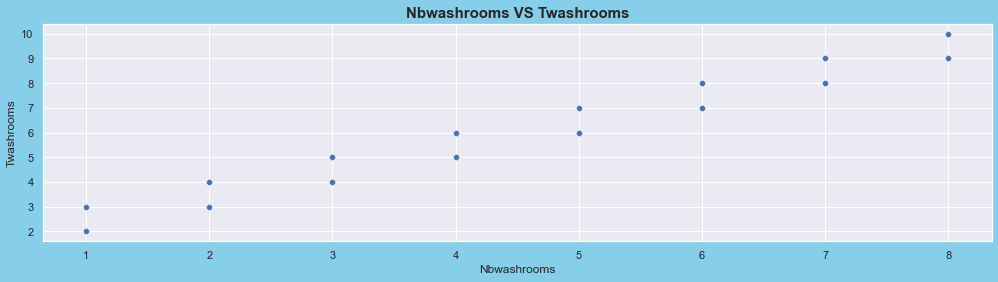

In [38]:
scatter_bi('Nbwashrooms','Twashrooms');

- total rwashrooms are highly correlated no of washrooms attached with bedrooms

### Is Area of roof effect the Expected price

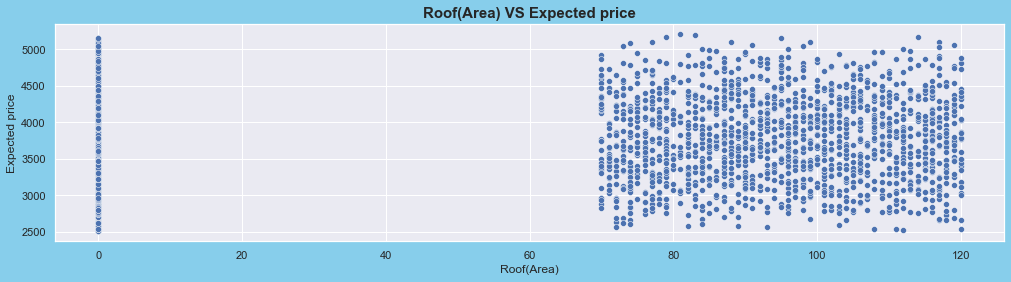

In [39]:
scatter_bi('Roof(Area)','Expected price');

### No relationship between roof(area) and expected price

### Is Area of roof effect the Expected price grade wise

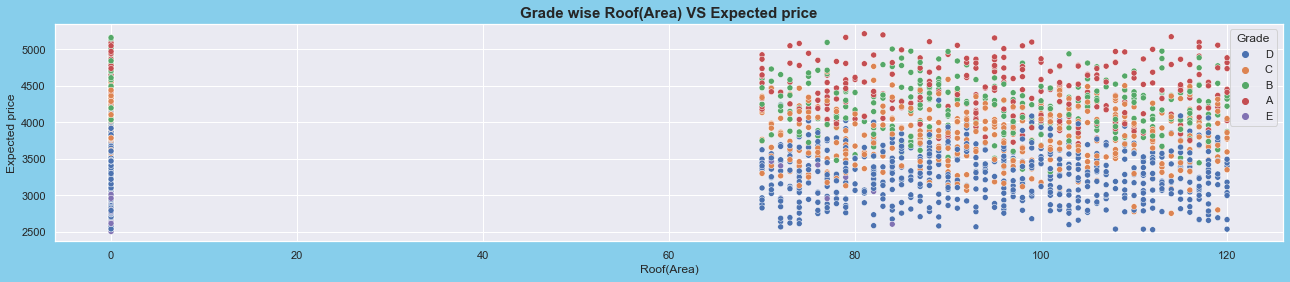

In [40]:
scatter_mul('Roof(Area)','Expected price','Grade');

### No such relationship between Grade wise roof area and expected price

#### What is the air pollution index level respect to Grade

In [295]:
groupby('Grade','API')

API                
            mean median  max min
Grade                           
A      71.857143   73.0  100  40
B      71.775510   71.0  100  40
C      71.509777   72.0  100  40
D      69.155906   69.0  100  40
E      55.065789   50.0  100  40

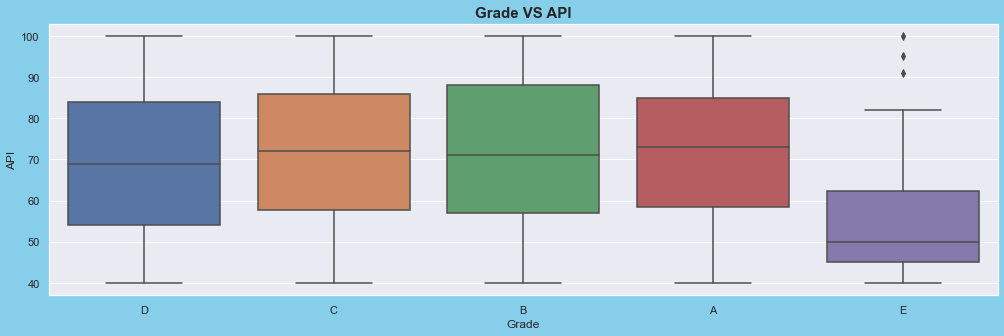

In [296]:
boxplot_bi('Grade','API')

### E graded houses are located in less populated area

## Data Preprocessing

In [299]:
df=data

In [300]:
def labelencoder(list):
    labelencoder=preprocessing.LabelEncoder()
    for i in list:
        col=i+"_encode"
        df[col]=labelencoder.fit_transform(df[i])
 

In [301]:
labelencoder(b_lst)

In [302]:
df.head(2)
df.shape

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade,roof_encode,Grade_encode
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D,0,3
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D,1,3


(3000, 16)

In [303]:
X1=df.select_dtypes(exclude="object")
X=X1.drop(['Grade_encode'],axis=1)
X.shape

(3000, 13)

In [404]:
## standarize the data
scalar=StandardScaler()
df_scalar=pd.DataFrame(scalar.fit_transform(X),columns=X.columns)
df_scalar.head(2)
df_scalar.shape

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,roof_encode
0,-1.731474,0.677077,-0.718985,-0.014071,-0.299518,-0.005973,-1.004968,-1.321837,-1.241831,0.501655,1.488214,-0.532429,-1.029090
1,-1.730319,1.603710,-1.422722,-0.625854,-0.882616,-1.125895,0.451785,0.026334,-0.625028,0.103034,0.307560,-0.481292,0.971733


(3000, 13)

In [412]:
df_scaled=pd.concat([df_scalar,df['Grade_encode']],axis=1)
df_scaled.head()
df_scaled.shape

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,roof_encode,Grade_encode
0,-1.731474,0.677077,-0.718985,-0.014071,-0.299518,-0.005973,-1.004968,-1.321837,-1.241831,0.501655,1.488214,-0.532429,-1.029090,3
1,-1.730319,1.603710,-1.422722,-0.625854,-0.882616,-1.125895,0.451785,0.026334,-0.625028,0.103034,0.307560,-0.481292,0.971733,3
2,-1.729164,-0.054476,-0.015248,-0.014071,-0.299518,-0.565934,1.067315,1.441914,0.608580,-0.352533,-0.282766,-0.061609,0.971733,2
3,-1.728009,0.238145,-0.718985,-0.625854,-0.882616,-0.565934,1.067315,-0.917385,-1.241831,-0.637262,-0.873093,-1.144319,0.971733,3
4,-1.726855,-0.249557,-0.015248,-0.625854,-0.299518,-0.565934,-1.004968,-1.389245,-0.625028,-1.719234,-1.463420,0.105911,-1.029090,3


(3000, 14)

<Figure size 1584x432 with 0 Axes>

<AxesSubplot:>

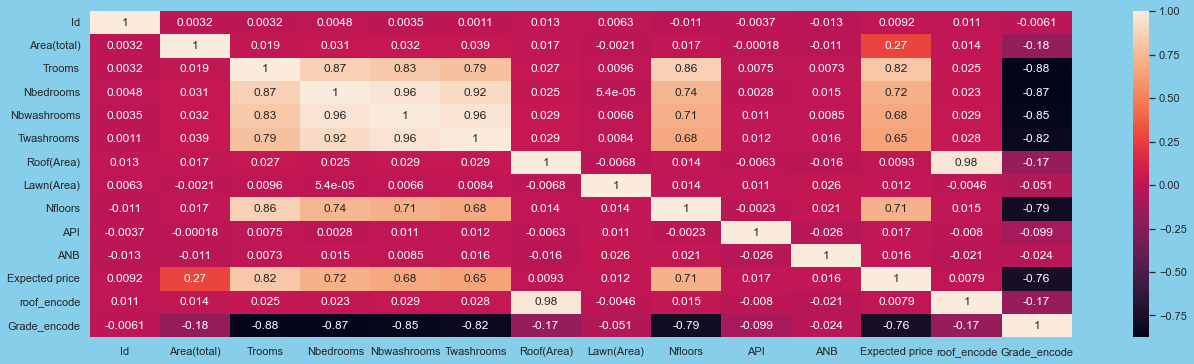

In [306]:
plt.figure(figsize=(22,6))
corr_data=X1.corr()
sb.heatmap(corr_data,annot=True)

- Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price have highly correlated with Grade
- Trooms and Nbedrooms are highly correlated to each other.So we can exclude Nbedrooms
- Nbwashrooms and Twashrooms are highly correlated with each other.So we can exclude Nbwashrooms
- we can represented roof_encode by roof area.So we can exclude roof_encode
- ID,ANB has very low correlation so, we can remove that feature also

In [307]:
X1.drop(['Nbedrooms','Nbwashrooms','roof_encode','Id','ANB','API'],axis=1,inplace= True)

In [308]:
x=X1.drop(['Grade_encode'],axis=1)
y=X1[['Grade_encode']]

In [309]:
x.head(2)
x.shape
y.head(2)
y.shape

,Area(total),Trooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,Expected price
0,339,6,6,0,76,2,3481
1,358,5,4,71,96,3,3510


(3000, 7)

,Grade_encode
0,3
1,3


(3000, 1)

In [310]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=82)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(2100, 7)

(2100, 1)

(900, 7)

(900, 1)

In [413]:
X2=df_scaled.drop(['Nbedrooms','Nbwashrooms','roof_encode','Id','ANB','API'],axis=1)

In [414]:
x_scale=X2.drop(['Grade_encode'],axis=1)
y_scale=X2[['Grade_encode']]

In [423]:
x_train_scale,x_test_scale,y_train,y_test=train_test_split(x_scale,y_scale,test_size=0.3,random_state=82)
x_train_scale.shape
y_train.shape
x_test_scale.shape
y_test.shape

(2100, 7)

(2100, 1)

(900, 7)

(900, 1)

-----------------------------------------------------------------------------

# Decision Tree Classifier

In [444]:
dtc=DecisionTreeClassifier().fit(x_train,y_train)

In [445]:
dtc.score(x_train,y_train)

1.0

In [446]:
dtc_predict=dtc.predict(x_test)
dtc_predict

array([2, 3, 2, 3, 3, 3, 0, 3, 3, 3, 3, 0, 1, 1, 3, 2, 1, 3, 0, 1, 3, 0,
       4, 3, 1, 0, 3, 1, 3, 3, 3, 1, 0, 3, 0, 1, 3, 1, 0, 0, 1, 2, 0, 3,
       3, 3, 3, 4, 2, 3, 1, 0, 2, 2, 2, 3, 3, 2, 1, 1, 3, 0, 2, 4, 0, 3,
       2, 3, 2, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 3, 3, 0, 2, 2, 2, 1, 1, 1,
       0, 3, 0, 1, 3, 3, 1, 3, 2, 0, 2, 2, 1, 2, 2, 2, 3, 2, 0, 1, 3, 2,
       0, 3, 1, 2, 2, 3, 0, 2, 1, 3, 2, 4, 3, 3, 3, 2, 1, 1, 3, 3, 3, 2,
       0, 2, 3, 0, 3, 2, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 0, 2, 2, 3, 3,
       2, 3, 0, 1, 4, 3, 2, 0, 2, 2, 2, 0, 3, 2, 1, 3, 3, 3, 3, 3, 1, 2,
       2, 2, 4, 3, 2, 1, 3, 3, 0, 2, 3, 0, 3, 3, 3, 2, 2, 1, 3, 1, 3, 3,
       3, 3, 0, 3, 2, 3, 3, 1, 3, 2, 3, 0, 3, 0, 2, 1, 2, 3, 3, 1, 2, 3,
       3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 3, 0, 3, 3, 3, 3, 2,
       3, 2, 3, 3, 0, 2, 3, 3, 2, 1, 3, 3, 1, 3, 1, 2, 1, 0, 1, 3, 3, 2,
       3, 3, 3, 3, 0, 3, 3, 2, 2, 0, 1, 3, 2, 3, 3, 4, 3, 0, 3, 3, 4, 1,
       2, 1, 3, 3, 3, 3, 2, 3, 2, 3, 3, 0, 3, 1, 3,

In [447]:
r2_test=dtc.score(x_test,y_test)
r2_test

0.7777777777777778

In [448]:
print(classification_report(y_test,y_predict_dtc))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       120
           1       0.74      0.80      0.77       160
           2       0.82      0.75      0.79       214
           3       0.89      0.91      0.90       381
           4       0.50      0.44      0.47        25

    accuracy                           0.83       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.83      0.83      0.83       900



In [449]:
accuracy_score(y_test,y_predict_dtc)

0.8288888888888889

In [450]:
matrix1=confusion_matrix(y_test,y_predict_dtc)
matrix1

array([[ 98,  22,   0,   0,   0],
       [ 19, 128,  13,   0,   0],
       [  0,  24, 161,  29,   0],
       [  0,   0,  22, 348,  11],
       [  0,   0,   0,  14,  11]], dtype=int64)

<Figure size 864x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 21.5, 'TARGET VALUE')

Text(84.5, 0.5, 'PREDICTED VALUE')

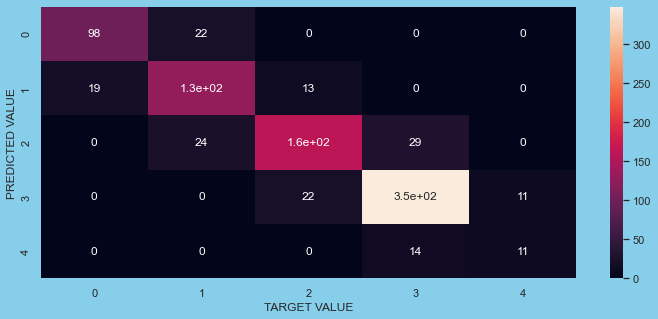

In [451]:
plt.figure(figsize=(12,5))
sb.heatmap(matrix1,annot=True)
plt.xlabel("TARGET VALUE")
plt.ylabel("PREDICTED VALUE")
plt.show()

In [452]:
print('accuracy:', accuracy_score(y_test, y_predict_dtc))
print('recall:', recall_score(y_test, y_predict_dtc, average='weighted'))
print('f1-score:', f1_score(y_test, y_predict_dtc, average='weighted'))
print('precision:', precision_score(y_test, y_predict_dtc,average='weighted'))


accuracy: 0.8288888888888889
recall: 0.8288888888888889
f1-score: 0.8279309835442357
precision: 0.828443809410385


## Using Grid Search Cv technique to find the optimal parameter for decision tree classifier

In [453]:
dtm=DecisionTreeClassifier()

In [315]:
params={'max_depth':list(range(2,20)),'min_samples_split': list(range(5,200))}

In [316]:
grid_search=GridSearchCV(dtm,param_grid=params,cv=4,scoring='f1_weighted',verbose=1)

In [317]:
grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 3510 candidates, totalling 14040 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'min_samples_split': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                               14, 15, 16, 17, 18, 19, 20, 21,
                                               22, 23, 24, 25, 26, 27, 28, 29,
                                               30, 31, 32, 33, 34, ...]},
             scoring='f1_weighted', verbose=1)

In [318]:
grid_search.best_score_

0.8032951574182465

In [319]:
grid_search.best_params_

{'max_depth': 9, 'min_samples_split': 25}

In [320]:
dtc_best=grid_search.best_estimator_
dtc_best.feature_importances_

array([0.09833313, 0.57294917, 0.18309633, 0.08376975, 0.03517762,
       0.0083504 , 0.01832359])

In [321]:
imp_df = pd.DataFrame({
 "Varname": x_train.columns,
 "Imp": dtc_best.feature_importances_
})

In [322]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
1,Trooms,0.572949
2,Twashrooms,0.183096
0,Area(total),0.098333
3,Roof(Area),0.083770
4,Lawn(Area),0.035178
6,Expected price,0.018324
5,Nfloors,0.008350


## Decision tree classifier with hyper paramter tuning

In [500]:
dtc2=DecisionTreeClassifier(max_depth=9,min_samples_split=25)
dtc2.fit(x_train,y_train)
y_predict_dtc2=dtc2.predict(x_test)
y_predict_dtc2

DecisionTreeClassifier(max_depth=9, min_samples_split=25)

array([2, 3, 2, 3, 3, 2, 0, 3, 3, 3, 3, 1, 0, 1, 3, 2, 2, 3, 1, 1, 3, 0,
       4, 2, 1, 0, 3, 1, 3, 2, 3, 0, 0, 3, 0, 1, 3, 1, 0, 1, 1, 2, 0, 3,
       3, 4, 3, 3, 2, 3, 1, 0, 2, 2, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 0, 3,
       1, 3, 2, 1, 2, 4, 3, 1, 3, 3, 2, 3, 1, 3, 3, 0, 3, 2, 2, 1, 0, 1,
       0, 3, 0, 1, 3, 3, 1, 3, 2, 0, 2, 2, 1, 2, 3, 2, 3, 2, 0, 1, 3, 2,
       0, 3, 1, 2, 2, 3, 0, 2, 1, 2, 2, 3, 3, 3, 3, 2, 1, 1, 3, 3, 3, 2,
       0, 2, 3, 0, 3, 2, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 0, 2, 2, 3, 3,
       2, 3, 1, 2, 3, 3, 2, 0, 2, 3, 2, 0, 3, 2, 1, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 4, 3, 2, 2, 3, 3, 0, 3, 3, 1, 3, 3, 3, 2, 1, 1, 4, 0, 2, 2,
       3, 3, 1, 3, 2, 3, 3, 1, 3, 2, 3, 0, 3, 0, 2, 1, 2, 3, 3, 1, 2, 3,
       3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 2, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 2,
       3, 1, 3, 3, 0, 2, 3, 3, 2, 1, 3, 3, 1, 3, 2, 1, 1, 0, 1, 3, 3, 2,
       3, 3, 3, 3, 1, 3, 2, 2, 2, 0, 1, 3, 2, 3, 3, 3, 3, 1, 3, 3, 4, 1,
       2, 1, 3, 3, 3, 3, 2, 3, 2, 3, 3, 0, 3, 1, 3,

In [501]:
dtc2.score(x_train,y_train)
dtc2.score(x_test,y_test)

0.8742857142857143

0.83

In [502]:
accuracy_score(y_test,y_predict_dtc2)

0.83

In [503]:
print(classification_report(y_test,y_predict_dtc2))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       120
           1       0.71      0.76      0.73       160
           2       0.80      0.83      0.81       214
           3       0.91      0.92      0.92       381
           4       0.60      0.36      0.45        25

    accuracy                           0.83       900
   macro avg       0.77      0.72      0.74       900
weighted avg       0.83      0.83      0.83       900



In [504]:
matrix=confusion_matrix(y_test,y_predict_dtc2)
matrix

array([[ 90,  30,   0,   0,   0],
       [ 19, 121,  20,   0,   0],
       [  0,  20, 177,  17,   0],
       [  0,   0,  25, 350,   6],
       [  0,   0,   0,  16,   9]], dtype=int64)

<Figure size 864x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 21.5, 'TARGET VALUE')

Text(84.5, 0.5, 'PREDICTED VALUE')

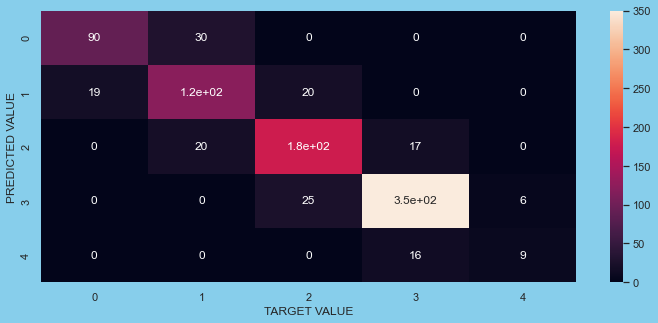

In [505]:
plt.figure(figsize=(12,5))
sb.heatmap(matrix,annot=True)
plt.xlabel("TARGET VALUE")
plt.ylabel("PREDICTED VALUE")
plt.show()

In [506]:
print('accuracy:', accuracy_score(y_test, y_predict_dtc2))
print('recall:', recall_score(y_test, y_predict_dtc2, average='weighted'))
print('f1-score:', f1_score(y_test, y_predict_dtc2, average='weighted'))
print('precision:', precision_score(y_test, y_predict_dtc2,average='weighted'))


accuracy: 0.83
recall: 0.83
f1-score: 0.8282089547555991
precision: 0.828992098286398


--------------------------------------------------------------------------------------------------------------

# RANDOM FOREST CLASSIFIER

In [461]:
rtc2=RandomForestClassifier(n_jobs=-1).fit(x_train,y_train)
rtc2.fit(x_train,y_train)
y_predict_rtc2=rtc2.predict(x_test)
y_predict_rtc2

C:\Users\User\AppData\Local\Temp\ipykernel_22028\1790454422.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rtc2=RandomForestClassifier(n_jobs=-1).fit(x_train,y_train)
C:\Users\User\AppData\Local\Temp\ipykernel_22028\1790454422.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rtc2.fit(x_train,y_train)


RandomForestClassifier(n_jobs=-1)

array([2, 3, 2, 3, 3, 3, 0, 4, 3, 2, 3, 1, 1, 1, 3, 2, 1, 3, 0, 1, 3, 0,
       3, 2, 1, 0, 3, 1, 3, 3, 3, 0, 0, 3, 0, 1, 3, 2, 0, 1, 0, 2, 0, 3,
       3, 3, 3, 3, 2, 3, 1, 0, 2, 2, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 0, 3,
       2, 3, 2, 1, 2, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 0, 3, 2, 2, 1, 0, 1,
       0, 3, 0, 0, 3, 3, 1, 3, 1, 0, 2, 2, 1, 2, 2, 2, 3, 2, 0, 1, 3, 2,
       0, 3, 1, 2, 2, 3, 0, 2, 1, 2, 2, 3, 3, 3, 3, 2, 0, 1, 3, 3, 3, 2,
       0, 2, 3, 0, 3, 2, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 2, 0, 2, 2, 3, 3,
       2, 3, 0, 1, 3, 4, 2, 0, 2, 2, 2, 0, 3, 2, 1, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 4, 3, 2, 1, 3, 3, 0, 3, 3, 1, 3, 3, 3, 2, 2, 1, 3, 1, 3, 2,
       3, 3, 1, 3, 2, 3, 3, 1, 3, 2, 3, 0, 3, 0, 2, 1, 1, 3, 3, 0, 2, 3,
       3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 2,
       4, 2, 3, 3, 0, 2, 3, 3, 2, 1, 3, 3, 0, 3, 2, 1, 1, 0, 2, 3, 3, 2,
       3, 3, 3, 3, 1, 3, 3, 2, 2, 0, 1, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1,
       3, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 3, 1, 3,

In [462]:
rtc2.score(x_train,y_train)
rtc2.score(x_test,y_test)

1.0

0.8455555555555555

In [463]:
accuracy_score(y_test,y_predict_rtc2)

0.8455555555555555

In [464]:
matrix3=confusion_matrix(y_test,y_predict_rtc2)
matrix3

array([[ 97,  23,   0,   0,   0],
       [ 22, 124,  14,   0,   0],
       [  0,  19, 177,  18,   0],
       [  0,   0,  23, 355,   3],
       [  0,   0,   0,  17,   8]], dtype=int64)

<Figure size 864x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 21.5, 'TARGET VALUE')

Text(84.5, 0.5, 'PREDICTED VALUE')

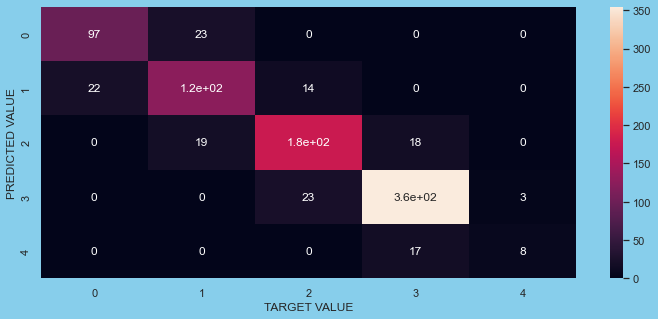

In [465]:
plt.figure(figsize=(12,5))
sb.heatmap(matrix3,annot=True)
plt.xlabel("TARGET VALUE")
plt.ylabel("PREDICTED VALUE")
plt.show()

In [466]:
print(classification_report(y_test,y_predict_rtc2))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       120
           1       0.75      0.78      0.76       160
           2       0.83      0.83      0.83       214
           3       0.91      0.93      0.92       381
           4       0.73      0.32      0.44        25

    accuracy                           0.85       900
   macro avg       0.81      0.73      0.75       900
weighted avg       0.84      0.85      0.84       900



In [467]:
print('accuracy:', accuracy_score(y_test, y_predict_rtc2))
print('recall:', recall_score(y_test, y_predict_rtc2, average='weighted'))
print('f1-score:', f1_score(y_test, y_predict_rtc2, average='weighted'))
print('precision:', precision_score(y_test, y_predict_rtc2,average='weighted'))


accuracy: 0.8455555555555555
recall: 0.8455555555555555
f1-score: 0.842323101545716
precision: 0.8436918986989858



## Using Grid Search Cv technique to find the optimal parameter for Random Forest classifier

In [355]:
rtc=RandomForestClassifier(n_jobs=-1)

In [356]:
params2={'max_depth':[2,3,5,6,8,10,15,18],'min_samples_split': [5,10,20,30,40,50,70,80,100],'n_estimators':[10,15,25,30,50,70,80,90.100]}

In [357]:
grid_search2=GridSearchCV(rtc,param_grid=params2,cv=4,n_jobs=-1,verbose=1,scoring='f1_weighted')

In [358]:
grid_search2.fit(x_train,y_train)

Fitting 4 folds for each of 576 candidates, totalling 2304 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
288 fits failed out of a total of 2304.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 131, in _validate_estimator
    raise ValueError(
ValueError: n_estimators must be an integer, go

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 6, 8, 10, 15, 18],
                         'min_samples_split': [5, 10, 20, 30, 40, 50, 70, 80,
                                               100],
                         'n_estimators': [10, 15, 25, 30, 50, 70, 80, 90.1]},
             scoring='f1_weighted', verbose=1)

In [359]:
grid_search2.best_params_

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 70}

In [360]:
grid_search2.best_score_

0.8342170039309368

In [468]:
rtc1=RandomForestClassifier(n_estimators=70,n_jobs=-1,max_depth=10,min_samples_split=5)
rtc1.fit(x_train,y_train)
y_predict_rtc1=rtc1.predict(x_test)
y_predict_rtc1

C:\Users\User\AppData\Local\Temp\ipykernel_22028\3746198261.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rtc1.fit(x_train,y_train)


RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=70,
                       n_jobs=-1)

array([2, 3, 2, 3, 3, 3, 0, 4, 3, 3, 3, 0, 1, 1, 3, 2, 1, 3, 0, 1, 3, 0,
       3, 3, 1, 0, 3, 1, 3, 3, 3, 0, 0, 3, 0, 1, 3, 2, 0, 1, 0, 2, 0, 3,
       3, 3, 3, 3, 2, 3, 1, 0, 2, 2, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 0, 3,
       2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 0, 3, 2, 2, 1, 0, 1,
       0, 3, 0, 0, 3, 3, 0, 3, 1, 0, 2, 2, 1, 2, 3, 2, 3, 2, 0, 1, 3, 2,
       0, 3, 1, 2, 2, 3, 0, 2, 1, 2, 2, 3, 3, 3, 3, 2, 1, 1, 3, 3, 3, 2,
       0, 2, 3, 0, 3, 2, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 0, 2, 2, 3, 3,
       2, 3, 0, 1, 3, 3, 2, 0, 2, 3, 2, 0, 3, 2, 1, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 4, 3, 2, 1, 3, 3, 0, 3, 3, 1, 3, 3, 3, 2, 1, 1, 3, 0, 3, 2,
       3, 3, 1, 3, 2, 3, 3, 1, 3, 2, 3, 0, 3, 0, 2, 1, 1, 3, 3, 1, 2, 3,
       3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 2,
       3, 2, 3, 3, 0, 2, 3, 3, 2, 1, 3, 3, 0, 3, 2, 1, 1, 0, 2, 3, 3, 2,
       3, 3, 3, 3, 0, 3, 3, 2, 2, 0, 1, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 1,
       3, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 3, 1, 3,

In [469]:
rtc1.score(x_train,y_train)

rtc1.score(x_test,y_test)

0.9538095238095238

0.8455555555555555

In [470]:
print(classification_report(y_test,y_predict_rtc1))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       120
           1       0.76      0.77      0.77       160
           2       0.83      0.81      0.82       214
           3       0.89      0.94      0.92       381
           4       0.86      0.24      0.38        25

    accuracy                           0.85       900
   macro avg       0.83      0.72      0.74       900
weighted avg       0.84      0.85      0.84       900



In [471]:
print('accuracy:', accuracy_score(y_test, y_predict_rtc1))
print('recall:', recall_score(y_test, y_predict_rtc1, average='weighted'))
print('f1-score:', f1_score(y_test, y_predict_rtc1, average='weighted'))
print('precision:', precision_score(y_test, y_predict_rtc1,average='weighted'))


accuracy: 0.8455555555555555
recall: 0.8455555555555555
f1-score: 0.8399318987462752
precision: 0.8446491040127085


In [472]:
matrix4=confusion_matrix(y_test,y_predict_rtc1)
matrix4

array([[ 99,  21,   0,   0,   0],
       [ 22, 123,  15,   0,   0],
       [  0,  17, 173,  24,   0],
       [  0,   0,  20, 360,   1],
       [  0,   0,   0,  19,   6]], dtype=int64)

<Figure size 864x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 21.5, 'TARGET VALUE')

Text(84.5, 0.5, 'PREDICTED VALUE')

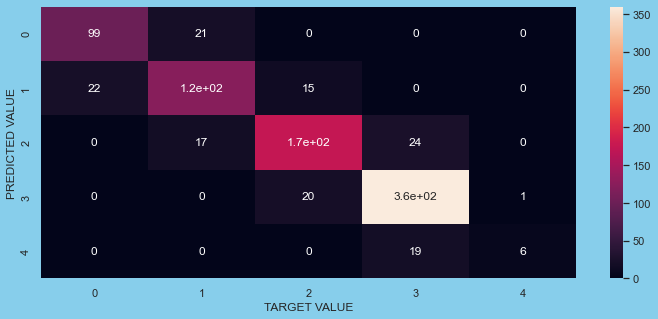

In [473]:
plt.figure(figsize=(12,5))
sb.heatmap(matrix4,annot=True)
plt.xlabel("TARGET VALUE")
plt.ylabel("PREDICTED VALUE")
plt.show()

-------------------------------------------------------------------------------

In [73]:
import math
math.sqrt(len(x_train))

45.8257569495584

In [97]:
k=list(range(45,60))

In [139]:
x_scaled=df_scaled.drop(['Grade_encode'],axis=1)
y_scaled=df_scaled[['Grade_encode']]

In [140]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled,y_scaled,test_size=0.3,random_state=82)

In [141]:
x_train1.shape
y_train1.shape
x_test1.shape
y_test1.shape

(2100, 13)

(2100, 1)

(900, 13)

(900, 1)

--------------------------------------------------------------------------------------------------------------

## Stacking classifier

In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
    

In [474]:
def stacking():
    weak_learners=[]
    weak_learners.append(('DTC',DecisionTreeClassifier(random_state=92)))
    weak_learners.append(('RFC',RandomForestClassifier(random_state=92)))
    weak_learners.append(('Naive Bayes',GaussianNB()))
    
    meta_model=KNeighborsClassifier()
    stack_model=StackingClassifier(estimators=weak_learners,final_estimator=meta_model,cv=4)
    return stack_model
    

In [475]:
model_stacking=stacking()

In [476]:
model_stacking.fit(x_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingClassifier(cv=4,
                   estimators=[('DTC', DecisionTreeClassifier(random_state=92)),
                               ('RFC', RandomForestClassifier(random_state=92)),
                               ('Naive Bayes', GaussianNB())],
                   final_estimator=KNeighborsClassifier())

In [478]:
model_stacking.score(x_train,y_train)

0.96

In [479]:
y_stack_pred=model_stacking.predict(x_test)

In [480]:
model_stacking.score(x_test,y_test)

0.8155555555555556

In [481]:
print('accuracy:', accuracy_score(y_test, y_stack_pred))
print('recall:', recall_score(y_test, y_stack_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_stack_pred, average='weighted'))
print('precision:', precision_score(y_test, y_stack_pred,average='weighted'))


accuracy: 0.8155555555555556
recall: 0.8155555555555556
f1-score: 0.8148829952927975
precision: 0.8151547793816848


In [490]:
matrix5=confusion_matrix(y_test,y_stack_pred)
matrix5

array([[ 99,  21,   0,   0,   0],
       [ 28, 115,  17,   0,   0],
       [  0,  21, 171,  22,   0],
       [  0,   0,  35, 338,   8],
       [  0,   0,   0,  14,  11]], dtype=int64)

<Figure size 864x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 21.5, 'TARGET VALUE')

Text(84.5, 0.5, 'PREDICTED VALUE')

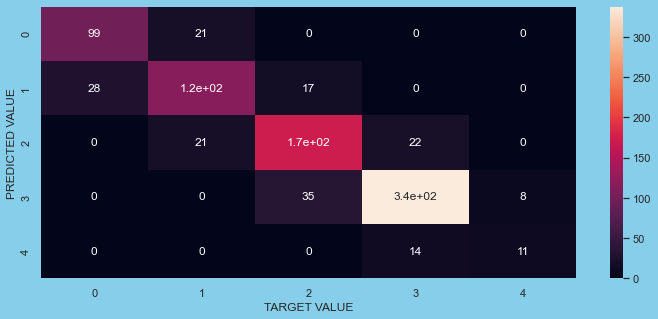

In [491]:
plt.figure(figsize=(12,5))
sb.heatmap(matrix5,annot=True)
plt.xlabel("TARGET VALUE")
plt.ylabel("PREDICTED VALUE")
plt.show()

-----------------------------------------------------------------------------------------------

## KNN CLASSIFIER

In [418]:
import math
math.sqrt(len(x_train_scale))

45.8257569495584

In [507]:
k=list(range(1,52,2))

In [508]:
error_rate=[]
accuracy1=[]
for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scale,y_train)
    y_pred=knn.predict(x_test_scale)
    accuracy1.append(accuracy_score(y_test,y_pred))
    error_rate.append(np.mean(y_pred!=y_test.values.ravel()))
    

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=13)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=17)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=19)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=21)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=23)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=25)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=27)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=29)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=31)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=33)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=35)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=37)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=39)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=41)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=43)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=45)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=47)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=49)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=51)

In [509]:
pd.DataFrame({"ErrorRATE":error_rate,"ACCuracy":accuracy1},index=range(1,52,2)).sort_values(by="ErrorRATE").head()

,ErrorRATE,ACCuracy
37,0.158889,0.841111
13,0.160000,0.840000
51,0.161111,0.838889
43,0.161111,0.838889
41,0.162222,0.837778


<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'ERROR RATE vs. K Value')

Text(0.5, 0, 'K')

Text(0, 0.5, 'ERROR RATE')

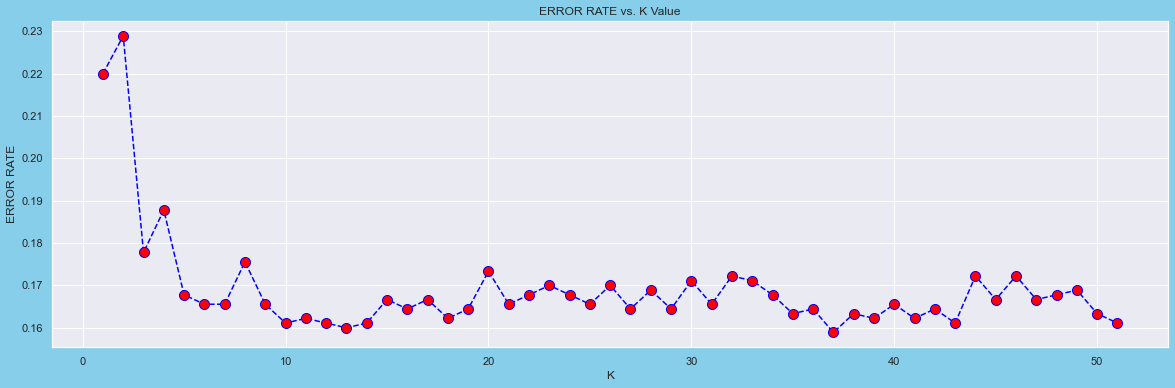

In [433]:
plt.figure(figsize=(20,6))
plt.plot(range(1,52),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('ERROR RATE vs. K Value')
plt.xlabel('K')
plt.ylabel('ERROR RATE')


<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'ACCURACY vs. K Value')

Text(0.5, 0, 'K')

Text(0, 0.5, 'ACCURACY')

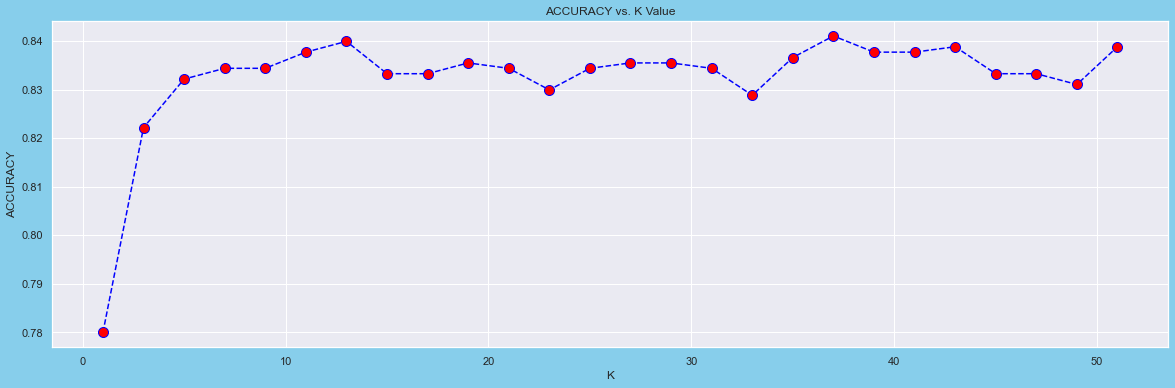

In [512]:
plt.figure(figsize=(20,6))
plt.plot(range(1,52,2),accuracy1,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('ACCURACY vs. K Value')
plt.xlabel('K')
plt.ylabel('ACCURACY')


### So the best K value is 37

In [513]:
model=KNeighborsClassifier(n_neighbors=37).fit(x_train_scale,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [514]:
y_pred=model.predict(x_test_scale)
y_pred

array([2, 3, 2, 3, 3, 3, 0, 4, 3, 2, 3, 1, 1, 1, 3, 2, 2, 3, 1, 1, 3, 0,
       3, 3, 1, 0, 3, 1, 3, 2, 3, 0, 1, 3, 0, 1, 3, 2, 0, 1, 1, 2, 0, 3,
       3, 4, 3, 3, 2, 3, 0, 0, 2, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 0, 3,
       2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 0, 3, 2, 2, 1, 0, 1,
       1, 3, 0, 1, 3, 3, 1, 3, 1, 0, 2, 3, 1, 2, 3, 3, 3, 2, 0, 1, 3, 2,
       0, 3, 1, 2, 2, 3, 0, 2, 1, 2, 2, 3, 3, 3, 3, 2, 0, 1, 3, 3, 3, 2,
       0, 2, 3, 0, 3, 2, 1, 3, 1, 1, 3, 1, 3, 3, 1, 2, 2, 1, 2, 2, 3, 3,
       2, 3, 0, 1, 3, 3, 2, 1, 2, 2, 2, 0, 3, 2, 1, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 4, 3, 1, 2, 3, 3, 0, 3, 3, 1, 3, 3, 3, 2, 1, 1, 3, 1, 3, 2,
       3, 3, 0, 3, 2, 3, 3, 1, 3, 2, 3, 0, 3, 0, 2, 1, 1, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 1, 1, 3, 2, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 2,
       3, 1, 3, 3, 0, 2, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 0, 2, 3, 3, 2,
       2, 3, 3, 3, 1, 3, 2, 2, 2, 1, 1, 3, 2, 3, 3, 3, 2, 1, 3, 3, 3, 1,
       3, 1, 3, 3, 3, 3, 2, 3, 2, 3, 3, 0, 3, 1, 3,

In [515]:
print(f"train score ={model.score(x_train_scale,y_train)}")

train score =0.85


In [516]:
print(f"test score ={model.score(x_test_scale,y_test)}")

test score =0.8411111111111111


In [517]:
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test,y_pred, average='weighted'))
print('precision:', precision_score(y_test,y_pred,average='weighted'))


accuracy: 0.8411111111111111
recall: 0.8411111111111111
f1-score: 0.8375576735080936
precision: 0.8462285557665857


In [518]:
matrix6=confusion_matrix(y_test,y_pred)
matrix6

array([[ 87,  33,   0,   0,   0],
       [ 17, 132,  11,   0,   0],
       [  0,  18, 175,  21,   0],
       [  0,   0,  26, 355,   0],
       [  0,   0,   0,  17,   8]], dtype=int64)

<Figure size 864x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 21.5, 'TARGET VALUE')

Text(84.5, 0.5, 'PREDICTED VALUE')

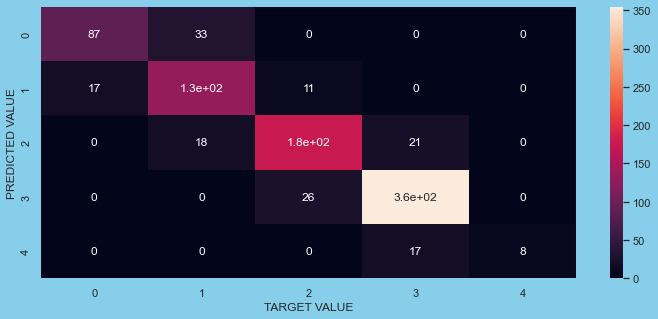

In [519]:
plt.figure(figsize=(12,5))
sb.heatmap(matrix6,annot=True)
plt.xlabel("TARGET VALUE")
plt.ylabel("PREDICTED VALUE")
plt.show()

## Evaluation

In [498]:
dic={"accuracy_train":[0.83,0.95,0.96,0.85],"accuracy_test":[0.83,0.84,0.81,0.84],"f1_score":[0.82,0.83,0.814,0.837],"PRECISION":[0.82,0.844,0.846,0.846],"RECALL":[0.83,0.845,0.815,0.841]}

In [499]:
comparision=pd.DataFrame(dic,index=['model-Decision tree','model- Random Forest','model-stacking','model-knn'])
comparision

,accuracy_train,accuracy_test,f1_score,PRECISION,RECALL
model-Decision tree,0.83,0.83,0.820,0.820,0.830
model- Random Forest,0.95,0.84,0.830,0.844,0.845
model-stacking,0.96,0.81,0.814,0.846,0.815
model-knn,0.85,0.84,0.837,0.846,0.841


## Conclusion :- After comparing f1 score KNN model is queit more good than others

## Interpretation:-
- WE can easily identify the grade of the house by the expected price.and the price is differ mainly respect to the no of floors and no of total rooms and washrooms 
- Graded E houses situated less polluted area than other graded house
- by observing the below table we can easily classified baesd on some criteria a house should be belong to which group. * represent maximum chances



In [297]:
dic={"average expected price":[4456.58,4247.22,3887.37,3360.35,3031.28],"range of price":["(3700-5216)","(3323-5163)","(2752-4864)","(2528-4435)","(2504-3704)"],"No of floors":["(5,6,7*)","(4,5,6*,7)","(3,4*,5*,6)","(1*,2*,3*,4,5)","(2)"],"No of rooms":["(9*)","(8*,9)","(6,7*,8)","(5*,6*,7)","(6)"]}

In [298]:
pd.DataFrame(dic,index=['Grade A','Grade B','Grade C','Grade D','Grade E'])

,average expected price,range of price,No of floors,No of rooms
Grade A,4456.58,(3700-5216),"(5,6,7*)",(9*)
Grade B,4247.22,(3323-5163),"(4,5,6*,7)","(8*,9)"
Grade C,3887.37,(2752-4864),"(3,4*,5*,6)","(6,7*,8)"
Grade D,3360.35,(2528-4435),"(1*,2*,3*,4,5)","(5*,6*,7)"
Grade E,3031.28,(2504-3704),(2),(6)


----------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------